## Question 1) Consider the following Python module. What value is displayed when the last expression (a) is evaluated? Explain your answer by indicating what happens in every executed statement.

In [63]:
a = 0
def b():
    global a
    a = c(a)
def c(a):
    return a + 2

b()
b()
b()
print(a)

6


# Solution: When the last expression 'a' is evaluated the output will be '6', because the inside function b() , ''global a" makes the variable 'a' global variable therefore when we call c(a) the value of global variable 'a' is passed as a parameter in the function and function returns a+2 which assigns to 'a'. since 'a' is global it will update every time a is changed from b() at last after 3 times we get the final value of 'a' as '6' 

# Question 2) Function fileLength(), given to you, takes the name of a file as input and returns the length of the file. Modify function fileLength() so that a friendly message is printed instead:

In [64]:
def fileLength(name):
#update the file name as the input and prints length
    try:
        text = open(name, 'r')
        data = text.read()
        print(len(data))
        text.close()
        
    except FileNotFoundError as file_error:
        print('fileLength of {} is dummy'.format(name))         
#returns error if file not found'

In [65]:
fileLength('currencies.txt')    

478


In [66]:
fileLength('midterm.py')

fileLength of midterm.py is dummy


### Question 3: Write a class named Marsupial that can be used as shown below: a. extends the Marsupial __init__ constructor to take, as input, the coordinates x and y of the Kangaroo object, b. supports method jump that takes number values dx and dy as input and moves the kangaroo by dx units along the x-axis and by dy units along the y-axis, and c. overloads the __str__ operator so it behaves as shown below.

In [67]:
class Marsupial():                #Super class for Kangaroo with list initiation'
    
    def __init__(self, initial = []):
        self.lst = []
    
    def put_in_pouch(self, item):     #Appending the list
        self.lst.append(item)
        
    def pouch_contents(self):
        return self.lst

In [68]:
m = Marsupial()

In [69]:
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')

In [70]:
m.pouch_contents()

['doll', 'firetruck', 'kitten']

In [71]:
class Marsupial:                                      #extending the class Marsupial
    def __init__(self):
        self.pouch = list()
        
    def put_in_pouch(self,obj):
        self.pouch.append(obj)
        
    def pouch_content(self):
        print(self.pouch)
 

 # creating a new class Kangaroo and inheriting Marsupial
  
class Kangaroo (Marsupial):                
    def __init__(self,x,y):                           # taking coordinates x and y to take as input
        super(Kangaroo, self).__init__()
        self.x = x
        self.y = y
        
    def jump(self,dx,dy):                             
        self.x+= dx                                  
        self.y+= dy
        
    def __str__(self):                                # overloading the string functiobn
        str_new = "i am a kangaroo located at coordinates ({},{})".format(self.x,self.y)
        return str_new

In [72]:
m=Kangaroo(0,0)
print(m)
m.put_in_pouch("doll")
m.put_in_pouch("kitten")
m.put_in_pouch("firetruck")
m.pouch_content()
m.jump(1,0)
m.jump(1,0)
m.jump(1,0)
print(m)

i am a kangaroo located at coordinates (0,0)
['doll', 'kitten', 'firetruck']
i am a kangaroo located at coordinates (3,0)


# Question 4) Implement a new GUI class App that combines user defined tkinter widget classes Calculator and Mortgage.

In [73]:
### Mortgage class

from tkinter import Tk, Canvas, Frame, BOTH, Button, Entry, END, Label, LEFT, RIGHT, RAISED
import math

class Mortgage(Frame):       #Class to calculate Monthly Mortgage Payments
    
    def __init__(self, parent):
        Frame.__init__(self, parent)
        
        label = Label(self, text='Loan Amount:')
        label.grid(row=0, column=0, padx=10, pady=10)
        
        self.loanEnt = Entry(self)
        self.loanEnt.grid(row=0, column=1, padx=10, pady=10)
        
        label = Label(self, text='Interest Rate:')
        label.grid(row=1, column=0, padx=10, pady=5)
        
        self.interestEnt = Entry(self)
        self.interestEnt.grid(row=1, column=1, padx=10, pady=5)
        
        label = Label(self, text='Loan Terms:')
        label.grid(row=2, column=0, padx=10, pady=5)
        
        self.termsEnt = Entry(self)
        self.termsEnt.grid(row=2, column=1, padx=10, pady=5)
        
        button = Button(self, text='Compute Mortgage:', command=self.compute)
        button.grid(row=3, column=0, padx=10, pady=5)
        
        self.mortgageAmount = Entry(self)
        self.mortgageAmount.grid(row=3, column=1, padx=10, pady=5)
        
    def compute(self):
        self.P = float(self.loanEnt.get())
        self.r = float(self.interestEnt.get())/100
        self.t = float(self.termsEnt.get())
        self.n = 12
        self.M = (self.P*(self.r/self.n)*(1 + (self.r / self.n))**(self.n*self.t))/(((1 + (self.r / self.n))**(self.n*self.t)) - 1)
        self.mortgageAmount.delete(0, END)
        self.mortgageAmount.insert(0, round(self.M, 2))
        
        #referred https://www.geeksforgeeks.org/python-simple-gui-calculator-using-tkinter/, https://www.tutorialspoint.com/simple-gui-calculator-using-tkinter-in-python

In [74]:
# Calculator class

class Calculator(Frame):
    
    def __init__(self, parent):
        Frame.__init__(self, parent)
        
        self.displayArea = Entry(self, bg = 'gray75')
        self.displayArea.grid(row=0, column=1, padx=5, pady=5)
        self.displayArea.focus_set()
        
        buttonMC = Button(self, text='MC', bg ='white', command=self.clearall, height=1, width=3, relief=RAISED)
        buttonMC.grid(row=1, column=0, padx=5, pady=5)
        
        buttonMP = Button(self, text='M+', bg ='white', command=self.clearall, height=1, width=3, relief=RAISED)
        buttonMP.grid(row=1, column=1, padx=5, pady=5)
        
        buttonMM = Button(self, text='M-', bg ='white', command=self.clearall, height=1, width=3, relief=RAISED)
        buttonMM.grid(row=1, column=2, padx=5, pady=5)
        
        buttonMR = Button(self, text='MR', bg ='white', command=self.clearall, height=1, width=3, relief=RAISED)
        buttonMR.grid(row=1, column=3, padx=5, pady=5)
        
        ##
        
        
        buttonC = Button(self, text='C', bg ='white', height=1, width=3, relief=RAISED, command=self.clearall)
        buttonC.grid(row=2, column=0, padx=5, pady=5)
        
        buttonSquareRoot = Button(self, text='SqR', bg ='white', height=1, width=3, relief=RAISED, command=self.squareRoot)
        buttonSquareRoot.grid(row=2, column=1, padx=5, pady=5)
        
        buttonSquare = Button(self, text='x^2', bg ='white', height=1, width=3, relief=RAISED, command=self.square)
        buttonSquare.grid(row=2, column=2, padx=5, pady=5)
        
        buttonPlus = Button(self, text='+', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action('+'))
        buttonPlus.grid(row=2, column=3, padx=5, pady=5)
        
        ##
        
        button7 = Button(self, text='7', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(7))
        button7.grid(row=3, column=0, padx=5, pady=5)
        
        button8 = Button(self, text='8', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(8))
        button8.grid(row=3, column=1, padx=5, pady=5)
        
        button9 = Button(self, text='9', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(9))
        button9.grid(row=3, column=2, padx=5, pady=5)
        
        buttonMinus = Button(self, text='-', bg ='white', width=3, relief=RAISED, command=lambda:self.action('-'))
        buttonMinus.grid(row=3, column=3, padx=5, pady=5)
        
        ##
        
        button4 = Button(self, text='4', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(4))
        button4.grid(row=4, column=0, padx=5, pady=5)
        
        button5 = Button(self, text='5', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(5))
        button5.grid(row=4, column=1, padx=5, pady=5)
        
        button6 = Button(self, text='6', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(6))
        button6.grid(row=4, column=2, padx=5, pady = 5)
        
        buttonMinus = Button(self, text='*', bg ='white', width=3, relief=RAISED, command=lambda:self.action('*'))
        buttonMinus.grid(row=4, column=3, padx=5, pady=5)
        
        ##
        
        button1 = Button(self, text='1', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(1))
        button1.grid(row=5, column=0, padx=5, pady=5)
        
        button2 = Button(self, text='2', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(2))
        button2.grid(row=5, column=1, padx=5, pady=5)
        
        button3 = Button(self, text='3', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(3))
        button3.grid(row=5, column=2, padx=5, pady=5)
        
        buttonDivide = Button(self, text='/', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action('/'))
        buttonDivide.grid(row=5, column=3, padx=5, pady=5)
        ##
        button0 = Button(self, text='0', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action(0))
        button0.grid(row=6, column=0, padx=5, pady=5)
        
        buttonPoint = Button(self, text='.', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action('.'))
        buttonPoint.grid(row=6, column=1, padx=5, pady=5)
        
        buttonPlusMinus = Button(self, text='+-', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.action('-'))
        buttonPlusMinus.grid(row=6, column=2, padx=5, pady=5)
        
        buttonEquals = Button(self, text='=', bg ='white', height=1, width=3, relief=RAISED, command=lambda:self.equals())
        buttonEquals.grid(row=6, column=3, padx=5, pady=5)
        
    def action(self,argi): 
        'pressed button value is inserted into the end of the text area'
        self.displayArea.insert(END,argi) 
                
    def getandreplace(self): 
        'replace x with *'
        self.expression = self.displayArea.get()  
        self.newtext=self.expression.replace('x','*') 
  
  
    def equals(self): 
        """when the equal button is pressed"""
        self.getandreplace() 
        try: 
            # evaluate the expression using the eval function 
            self.value= eval(self.newtext)  
        except SyntaxError or NameError: 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,'Invalid Input!') 
        else: 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,self.value)
            
    def clearall(self): 
        """when clear button is pressed,clears the text input area"""
        self.displayArea.delete(0,END) 
        
    def squareRoot(self): 
        """squareroot method"""
        self.getandreplace() 
        try: 
            # evaluate the expression using the eval function 
            self.value= eval(self.newtext)  
        except SyntaxError or NameError: 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,'Invalid Input!') 
        else: 
            self.sqrtval=math.sqrt(self.value) 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,self.sqrtval) 
  
    def square(self): 
        """square method"""
        self.getandreplace() 
        try: 
            #evaluate the expression using the eval function 
            self.value= eval(self.newtext)  
        except SyntaxError or NameError: 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,'Invalid Input!') 
        else: 
            self.sqval=math.pow(self.value,2) 
            self.displayArea.delete(0,END) 
            self.displayArea.insert(0,self.sqval) 

In [75]:
#App Class
class App(Frame):  # Mortgage and Calculator classes'
    
    def __init__(self, master):
        Frame.__init__(self, master)
        mortgage = Mortgage(self)
        mortgage.pack(side=LEFT)
        calculator = Calculator(self)
        calculator.pack(side=RIGHT)

In [ ]:
from tkinter import Tk
root = Tk()
app = App(root)
app.pack()
root.mainloop()

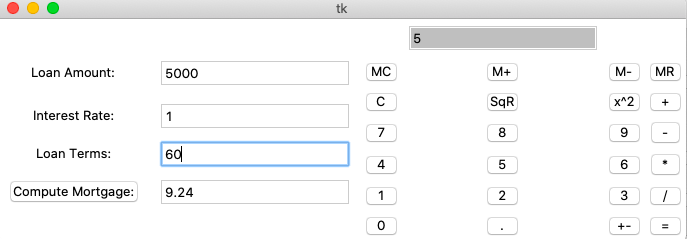

# Question 5: Write function collatz() that takes a positive integer x as input and prints the Collatz sequence starting at x. A Collatz sequence is obtained by repeatedly applying this rule to the previous number x in the sequence:

In [1]:
#collatz that takes a positive integer x

def collatz(x):
    print(int(x))
    if x==1:                       # using condition statemnt to check the sequence of x
        return int(x)
    elif x%2 == 0:
        return collatz(x/2)        # checking for x/2
    else:
        return collatz(3*x+1)      # checking for last requirement according to question
    

In [2]:
collatz(1)

1


1

In [3]:
collatz(10)

10
5
16
8
4
2
1


1

# Question 6: Write a recursive method binary() that takes a non-negative integer n and prints the binary representation of integer n.

In [4]:
def binary(n):   #Returns binary value of a non-negative integer'
    try:
        if(n<0):
            raise Error        #Raises Error if n is -ve
        if n > 1:                   
            binary(n//2)            #Recursive Function of half value of n without decimals
        print (n % 2, end = '')
    except ValueError:
        print('Value n shouldnt be -ve')

In [5]:
binary(0)

0

In [6]:
binary(1)

1

In [7]:
binary(3)

11

In [8]:
binary(9)

1001

# Question 7: Implement a class named HeadingParser that can be used to parse an HTML document, and retrieve and print all the headings in the document. You should implement your class as a subclass of HTMLParser, defined in Standard Library module html.parser. When fed a string containing HTML code, your class should print the headings, one per line and in the order in which they appear in the document. Each heading should be indented as follows: an h1 heading should have indentation 0, and h2 heading should have indentation 1, etc. Test your implementation using w3c.html.

In [9]:
# importing HTMLParser from  html.parser

from html.parser import HTMLParser
import os                                  

class HeadingParser(HTMLParser):                # inheriting HTMLParser 
    def __init__(self):
        HTMLParser.__init__(self)
        self.heading = True
        
    def handle_starttag(self,tag,attrs):        # overriding method of HTMLParser
        if tag == 'h1':                         
            print("",end="")
            self.heading = True
        elif tag == 'h2':
            print(" ",end="")               
            self.heading = True
        else:                                  
            self.heading = False             
            
            
    def handle_data(self,data):               
        if self.heading == True:
             print(data)
             self.heading=False

In [10]:
print(os.getcwd())
infile=open("w3c.html")                 
content=infile.read()
infile.close()
hp=HeadingParser()
hp.feed(content)

/Users/vijaysanapala
W3C Mission
 Principles 



# Question 8: Implement recursive function webdir() that takes as input: a URL (as a string) and non-negative integers depth and indent. Your function should visit every web page reachable from the starting URL web page in depth clicks or less, and print each web page's URL. As shown below, indentation, specified by indent, should be used to indicate the depth of a URL.

In [11]:
# importing HTMLParser

from html.parser import HTMLParser
import requests

class UrlParser(HTMLParser):               # creating a class and inheriting HTMLParser in it
 
    def __init__(self):
        self.urls = []                     # taking empty list to add url
        HTMLParser.__init__(self)

    def handle_starttag(self, tag, attrs):
        self.start_tag = tag
        if tag == 'a':                     
            for name,value in attrs:
                if name == 'href':
                    self.urls.append(value)

                    
# defining a function get urls
    def getUrls(self):                   
        return self.urls

    
# defining a webdir function that takes urls depth and indent

def webdir(url,depth,indent):

    if(depth==-1):
        return
    
    tabs = ""
    for x in range(indent):            
        tabs = tabs+"\t"
    print(tabs+url)
    
    urlParser = UrlParser()
    html = requests.get(url)
    urlParser.feed(html.text)
    urls = urlParser.getUrls()
    

#to print the urls of the website

    for _url in urls:
        if(not 'http' in _url):
            _url = url+_url
        webdir(_url,depth-1,indent+1)



In [61]:
# calling all the available links of the website
webdir("https://www.geeksforgeeks.org",2,0)

https://www.geeksforgeeks.org
	https://www.geeksforgeeks.org/
		https://www.geeksforgeeks.org/
		https://www.geeksforgeeks.org/analysis-of-algorithms-set-1-asymptotic-analysis/
		https://www.geeksforgeeks.org/analysis-of-algorithms-set-2-asymptotic-analysis/
		https://www.geeksforgeeks.org/analysis-of-algorithms-set-3asymptotic-notations/
		https://www.geeksforgeeks.org/analysis-of-algorithems-little-o-and-little-omega-notations/
		https://www.geeksforgeeks.org/lower-and-upper-bound-theory/
		https://www.geeksforgeeks.org/analysis-of-algorithms-set-4-analysis-of-loops/
		https://www.geeksforgeeks.org/analysis-algorithm-set-4-master-method-solving-recurrences/
		https://www.geeksforgeeks.org/analysis-algorithm-set-5-amortized-analysis-introduction/
		https://www.geeksforgeeks.org/g-fact-86/
		https://www.geeksforgeeks.org/pseudo-polynomial-in-algorithms/
		https://www.geeksforgeeks.org/polynomial-time-approximation-scheme/
		https://www.geeksforgeeks.org/a-time-complexity-question/
		ht

SSLError: HTTPSConnectionPool(host='write.geeksforgeeks.org', port=443): Max retries exceeded with url: /posts-new (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

# Question 9: Write SQL queries on the below database table that return: Assuming the table name as Weather
# a) All the temperature data.
# b) All the cities, but without repetition.
# c) All the records for India.
# d) All the Fall records.
# e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.
# f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.
# g) The total annual rainfall for Cairo.
# h) The total rainfall for each season.

# Solution:
## a: SELECT temperature FROM Weather 
## b: SELECT DISTINCT City FROM Weather
## c: SELECT * FROM Weather WHERE Country = 'India'
## d: SELECT * FROM Weather WHERE Season = 'Fall'
## e: SELECT City, Country, Season FROM Weather WHERE Rainfall BETWEEN 200 AND 400
## f: SELECT City, Country FROM Weather WHERE Season = 'Fall' AND temperature >20 ORDER BY temperature ASC
## g: SELECT Sum(Rainfall) FROM Weather WHERE City='Cairo';
## h: SELECT Season,Sum(Rainfall) FROM Weather GROUP BY Season;

# Question 10: Suppose list words is defined as follows: words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'] Write list comprehension expressions that use list words and generate the following lists:

# Solution:

In [62]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

# to print the items of list in upper case 
a = [i.upper() for i in words]

# to print the items of list in lower case
b = [i.lower() for i in words]

# to print length of each item of list
c = [len(i) for i in words]

# to print items in upper,lower case and the length of items
d = [[i.upper(),i.lower(),len(i)] for i in words]

# to print items which has length 4 or > 4
e = [i for i in words if len(i)>=4]

print(a)
print(b)
print(c)
print(d)
print(e)


['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']
['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
[3, 5, 5, 3, 5, 4, 3, 4, 3]
[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]
['quick', 'brown', 'jumps', 'over', 'lazy']
